# Exercise  1

Agafa un conjunt de dades de tema esportiu que t'agradi i normalitza els atributs categòrics en dummy. Estandaritza els atributs numèrics amb StandardScaler.

In [272]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')


In [45]:
#Leo los datos
df=pd.read_csv('mlbBat10.txt', delimiter ='\t',encoding = 'utf-8')

In [46]:
df.head()

,name,team,position,G,AB,R,H,2B,3B,HR,RBI,TB,BB,SO,SB,CS,OBP,SLG,AVG
0,I Suzuki,SEA,OF,162,680,74,214,30,3,6,43,268,45,86,42,9,0.359,0.394,0.315
1,D Jeter,NYY,SS,157,663,111,179,30,3,10,67,245,63,106,18,5,0.340,0.370,0.270
2,M Young,TEX,3B,157,656,99,186,36,3,21,91,291,50,115,4,2,0.330,0.444,0.284
3,J Pierre,CWS,OF,160,651,96,179,18,3,1,47,206,45,47,68,18,0.341,0.316,0.275
4,R Weeks,MIL,2B,160,651,112,175,32,4,29,83,302,76,184,11,4,0.366,0.464,0.269


In [118]:
#Genero DF del atributo 'position' como dummy 
dummypos=pd.get_dummies(df.position,prefix='p')

In [119]:
dummypos.head()

,p_-,p_1B,p_2B,p_3B,p_C,p_DH,p_OF,p_P,p_SS
0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,1
2,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,0,0


In [120]:
#Genero DF del atributo 'team' como dummy 
dummyteam=pd.get_dummies(df.team,prefix='t')

In [121]:
dummyteam.head()

,t_ARI,t_ATL,t_BAL,t_BOS,t_CHC,t_CIN,t_CLE,t_COL,t_CWS,t_DET,...,t_PHI,t_PIT,t_SD,t_SEA,t_SF,t_STL,t_TB,t_TEX,t_TOR,t_WSH
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [167]:
#creo dataframe a partir de DF dummys
dfdummy=pd.concat([df,dummypos,dummyteam],axis=1)

In [168]:
dfdummy

,name,team,position,G,AB,R,H,2B,3B,HR,...,t_PHI,t_PIT,t_SD,t_SEA,t_SF,t_STL,t_TB,t_TEX,t_TOR,t_WSH
0,I Suzuki,SEA,OF,162,680,74,214,30,3,6,...,0,0,0,1,0,0,0,0,0,0
1,D Jeter,NYY,SS,157,663,111,179,30,3,10,...,0,0,0,0,0,0,0,0,0,0
2,M Young,TEX,3B,157,656,99,186,36,3,21,...,0,0,0,0,0,0,0,1,0,0
3,J Pierre,CWS,OF,160,651,96,179,18,3,1,...,0,0,0,0,0,0,0,0,0,0
4,R Weeks,MIL,2B,160,651,112,175,32,4,29,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1194,B Wood,KC,P,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1195,M Wuertz,OAK,P,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1196,M Zagurski,PHI,P,7,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1197,B Ziegler,OAK,P,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
#Elimino las columnas a partir de las cuales he generado los  variables dummy 

In [169]:
dfdummy=dfdummy.drop(['team', 'position'], axis=1)


In [150]:
dfdummy.head()

,name,G,AB,R,H,2B,3B,HR,RBI,TB,...,t_PHI,t_PIT,t_SD,t_SEA,t_SF,t_STL,t_TB,t_TEX,t_TOR,t_WSH
0,I Suzuki,162,680,74,214,30,3,6,43,268,...,0,0,0,1,0,0,0,0,0,0
1,D Jeter,157,663,111,179,30,3,10,67,245,...,0,0,0,0,0,0,0,0,0,0
2,M Young,157,656,99,186,36,3,21,91,291,...,0,0,0,0,0,0,0,1,0,0
3,J Pierre,160,651,96,179,18,3,1,47,206,...,0,0,0,0,0,0,0,0,0,0
4,R Weeks,160,651,112,175,32,4,29,83,302,...,0,0,0,0,0,0,0,0,0,0


In [40]:
#Estanderizo las variables numericas con StandardScaler


In [170]:
dfd=dfdummy[dfdummy.columns[1:57]]

In [125]:
scaler = StandardScaler()


In [171]:
resSd=scaler.fit_transform(dfd)

In [172]:
resSd

array([[ 2.25074813,  2.88271944,  2.07945887, ..., -0.17844229,
        -0.17083486, -0.19747101],
       [ 2.14978638,  2.79231721,  3.44780314, ..., -0.17844229,
        -0.17083486, -0.19747101],
       [ 2.14978638,  2.75509276,  3.00401581, ...,  5.60405259,
        -0.17083486, -0.19747101],
       ...,
       [-0.87906613, -0.73337001, -0.65722967, ..., -0.17844229,
        -0.17083486, -0.19747101],
       [-0.89925848, -0.73337001, -0.65722967, ..., -0.17844229,
        -0.17083486, -0.19747101],
       [-0.93964318, -0.73337001, -0.65722967, ..., -0.17844229,
        -0.17083486, -0.19747101]])

In [173]:
ressSddf = pd.DataFrame(resSd)
ressSddf

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,2.250748,2.882719,2.079459,3.440347,2.120792,1.422407,0.292109,0.979482,2.538682,1.536060,...,-0.183359,-0.19974,-0.188164,5.382843,-0.185775,-0.188164,-0.170835,-0.178442,-0.170835,-0.197471
1,2.149786,2.792317,3.447803,2.765802,2.120792,1.422407,0.834903,1.880873,2.263835,2.404417,...,-0.183359,-0.19974,-0.188164,-0.185775,-0.185775,-0.188164,-0.170835,-0.178442,-0.170835,-0.197471
2,2.149786,2.755093,3.004016,2.900711,2.675914,1.422407,2.327588,2.782264,2.813528,1.777270,...,-0.183359,-0.19974,-0.188164,-0.185775,-0.185775,-0.188164,-0.170835,5.604053,-0.170835,-0.197471
3,2.210363,2.728504,2.893069,2.765802,1.010548,1.422407,-0.386385,1.129714,1.797791,1.536060,...,-0.183359,-0.19974,-0.188164,-0.185775,-0.185775,-0.188164,-0.170835,-0.178442,-0.170835,-0.197471
4,2.210363,2.728504,3.484785,2.688711,2.305833,2.046891,3.413177,2.481800,2.944977,3.031563,...,-0.183359,-0.19974,-0.188164,-0.185775,-0.185775,-0.188164,-0.170835,-0.178442,-0.170835,-0.197471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1194,-0.959836,-0.733370,-0.657230,-0.684012,-0.654819,-0.451045,-0.522083,-0.635509,-0.663880,-0.634831,...,-0.183359,-0.19974,-0.188164,-0.185775,-0.185775,-0.188164,-0.170835,-0.178442,-0.170835,-0.197471
1195,-0.939643,-0.733370,-0.657230,-0.684012,-0.654819,-0.451045,-0.522083,-0.635509,-0.663880,-0.634831,...,-0.183359,-0.19974,-0.188164,-0.185775,-0.185775,-0.188164,-0.170835,-0.178442,-0.170835,-0.197471
1196,-0.879066,-0.733370,-0.657230,-0.684012,-0.654819,-0.451045,-0.522083,-0.635509,-0.663880,-0.634831,...,5.453768,-0.19974,-0.188164,-0.185775,-0.185775,-0.188164,-0.170835,-0.178442,-0.170835,-0.197471
1197,-0.899258,-0.733370,-0.657230,-0.684012,-0.654819,-0.451045,-0.522083,-0.635509,-0.663880,-0.634831,...,-0.183359,-0.19974,-0.188164,-0.185775,-0.185775,-0.188164,-0.170835,-0.178442,-0.170835,-0.197471


In [175]:
ressSddf.columns=dfd.columns

In [176]:
ressSddf.head()

,G,AB,R,H,2B,3B,HR,RBI,TB,BB,...,t_PHI,t_PIT,t_SD,t_SEA,t_SF,t_STL,t_TB,t_TEX,t_TOR,t_WSH
0,2.250748,2.882719,2.079459,3.440347,2.120792,1.422407,0.292109,0.979482,2.538682,1.536060,...,-0.183359,-0.19974,-0.188164,5.382843,-0.185775,-0.188164,-0.170835,-0.178442,-0.170835,-0.197471
1,2.149786,2.792317,3.447803,2.765802,2.120792,1.422407,0.834903,1.880873,2.263835,2.404417,...,-0.183359,-0.19974,-0.188164,-0.185775,-0.185775,-0.188164,-0.170835,-0.178442,-0.170835,-0.197471
2,2.149786,2.755093,3.004016,2.900711,2.675914,1.422407,2.327588,2.782264,2.813528,1.777270,...,-0.183359,-0.19974,-0.188164,-0.185775,-0.185775,-0.188164,-0.170835,5.604053,-0.170835,-0.197471
3,2.210363,2.728504,2.893069,2.765802,1.010548,1.422407,-0.386385,1.129714,1.797791,1.536060,...,-0.183359,-0.19974,-0.188164,-0.185775,-0.185775,-0.188164,-0.170835,-0.178442,-0.170835,-0.197471
4,2.210363,2.728504,3.484785,2.688711,2.305833,2.046891,3.413177,2.481800,2.944977,3.031563,...,-0.183359,-0.19974,-0.188164,-0.185775,-0.185775,-0.188164,-0.170835,-0.178442,-0.170835,-0.197471


# Exercici 2

Continua amb el conjunt de dades de tema esportiu que t'agradi i aplica l'anàlisi de components principals.

In [178]:
corr =ressSddf.corr()

In [179]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


<AxesSubplot:>

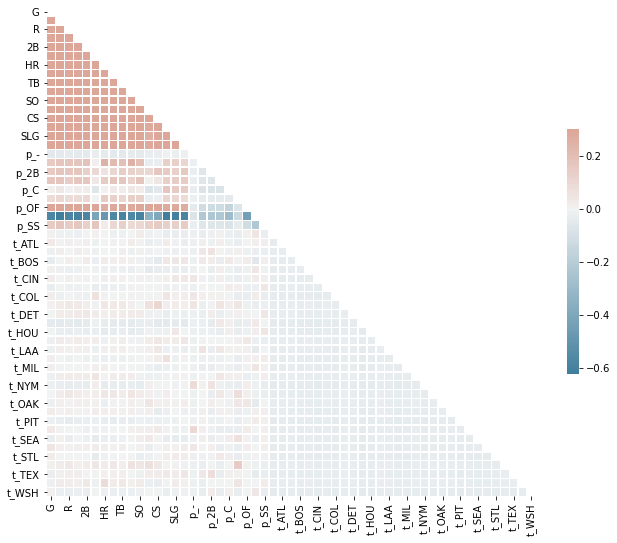

In [180]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [188]:
#Aplico PCA a DF estandartizado, con 2 componentes principales
pca2 = PCA(n_components=2)
pca2.fit(ressSddf)

PCA(n_components=2)

In [203]:
print(pca2.explained_variance_ratio_)


[0.22067737 0.03881285]


In [201]:
#Aplico PCA a DF estandartizado, con 5 componentes principales
pca5 = PCA(n_components=5)
pca5.fit(ressSddf)
print(pca5.explained_variance_ratio_)
print('suma:',pca5.explained_variance_ratio_.sum())

[0.22067737 0.03881505 0.03013416 0.02255235 0.02182138]
suma: 0.33400031930106744


In [237]:
#Aplico PCA a DF estandartizado, con 30 componentes principales
pca30 = PCA(n_components=30)
pca30.fit(ressSddf)
print(pca30.explained_variance_ratio_)
print('suma:',pca30.explained_variance_ratio_.sum())

[0.22067737 0.03881587 0.03014035 0.02288529 0.02240761 0.02179573
 0.02140356 0.02119771 0.02022006 0.01986253 0.01932192 0.01919925
 0.01903781 0.01895543 0.01891305 0.01889767 0.01888612 0.01886167
 0.01884879 0.01883834 0.01883559 0.01881799 0.018802   0.01879142
 0.01878572 0.01877489 0.01876593 0.01875347 0.01874563 0.01873628]
suma: 0.8169750318852047


In [204]:
#Aplico PCA a DF sin estandartizado, con 2 componentes principales
pca2S = PCA(n_components=2)
pca2S.fit(dfd)
print(pca2S.explained_variance_ratio_)
print('suma:',pca2S.explained_variance_ratio_.sum())

[0.98025434 0.00715746]
suma: 0.9874117992620359


In [205]:
#Aplico PCA a DF sin estandartizado, con 3 componentes principales
pca3S = PCA(n_components=3)
pca3S.fit(dfd)
print(pca3S.explained_variance_ratio_)
print('suma:',pca3S.explained_variance_ratio_.sum())

[0.98025434 0.00715746 0.00550593]
suma: 0.992917728813123


Una parte vital del uso del PCA en la práctica es la capacidad de estimar cuántos componentes son necesarios para describir los datos. Esto puede determinarse observando la proporción de varianza explicada acumulada en función del número de componentes:

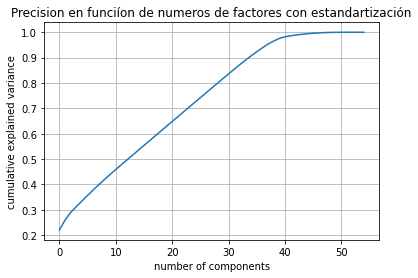

In [235]:
pca = PCA().fit(ressSddf)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.grid()
plt.title("Precision en funciíon de numeros de factores con estandartización")
plt.show()

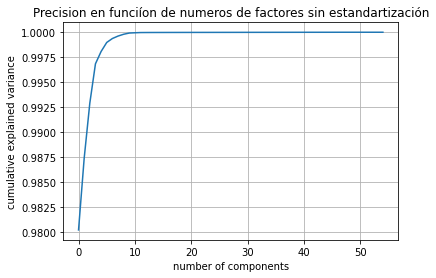

In [234]:
pca = PCA().fit(dfd)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.title("Precision en funciíon de numeros de factores sin estandartización")
plt.grid()
plt.show() 

Como se puede ver si usamos los datos sin estandartización con dos factores se obtiene la precision de 99% en cambio para obtener la preciosíon de 90% en los datos con estandartizacíon hay que usar mas de 35 componentes 

Text(0.5, 1.0, 'Dos componentes del PCA sin estandartización ')

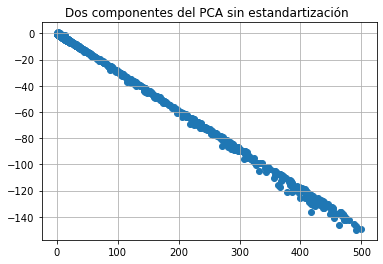

In [269]:
X = pca.transform(dfd)

plt.scatter(X[:, 0], X[:, 1])
plt.grid()
plt.title("Dos componentes del PCA sin estandartización ")

# Exercici 3

Continua amb el conjunt de dades de tema esportiu que t'agradi i normalitza les dades tenint en compte els outliers.

In [286]:
from sklearn.preprocessing import RobustScaler
transf = RobustScaler().fit(dfd).transform(dfd)

In [289]:

transf


array([[ 1.72368421,  2.87053571,  2.67924528, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.65789474,  2.79464286,  4.0754717 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.65789474,  2.76339286,  3.62264151, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-0.31578947, -0.16517857, -0.11320755, ...,  0.        ,
         0.        ,  0.        ],
       [-0.32894737, -0.16517857, -0.11320755, ...,  0.        ,
         0.        ,  0.        ],
       [-0.35526316, -0.16517857, -0.11320755, ...,  0.        ,
         0.        ,  0.        ]])